# D212 Performance Assessment Task 1

This is my performance assessment for task 1. 012047746



## A1:PROPOSAL OF QUESTION


The research question for this analysis is "Is it possible to seperate customers into different segmentations based upon their income and monthly charge using k-means clustering?". This is an important question to ask that addresses the organization's needs because knowing how to segment different customer's by income and monthly charge allows us to identify if their is any disparity in where the organization is pricing the product for the customer. For instance, maybe the organization should implement a student discount for low income students to increase the customer base and be more broad appeal.

## A2:DEFINED GOAL



One goal of this analysis is to have a list of groups that identify similar customers. This will be achieved through the use of a k-means clustering model to group segments of customers together based on similar numerical attributes. The different k-means clusters will be organized by using income and monthly charge.

## B1:EXPLANATION OF THE CLUSTERING TECHNIQUE



The clustering technique graphs the numerical variables on a graph. Then using using the distance from each point to another, assigns various points to different groups. There are two ways to do clustering: hierarchical and k-means. Hierarchical clusters start with every point as its own cluster. Then, it starts to merge clusters until the parameters are met for the type of hierarchical clustering are met. For k-means, a random point on the graph is created based upon n number of points specified by the user. Then closest points are assigned to the grouping until each point is assigned a grouping.

Its important to note that this process is iterative. That means that the means the model with plot n number of centroids, and then assign data points to that centroid until all data points are assigned. This process is then repeated with centroids assigned to new points on the graph until a certain stopping criteria is met.

## B2:SUMMARY OF THE TECHNIQUE ASSUMPTION



K-means assumes that points can be sorted into different spherical groupings based upon distance from random points. It also assumes that the user can pick the proper number of n points to choose for the groupings, which can be estimated using certain techniques.

The assumption of the hierarchical clustering method assumes that close points are similar to one another

## B3:PACKAGES OR LIBRARIES LIST


There are the packages that are used in the analysis and why they are required:
- Pandas: Pandas is important as it add in dataframes which allows us to import csv's, modify their data, and input it into models
- Numpy: Numpy is used in this analysis in order to read data from a column in a dataframe. Numpy is used to work with data in an array format
- Scipy: Scipy is used in this analysis for the kmeans clustering model, finding cluster centroids, normalizing the data, and finding z-score.
- Matplotlib: Matplotlib is used to plot graphs
- Seaborn: Seaborn is used to visualize data similar to matplotlib

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from scipy.cluster.vq import kmeans, vq, whiten
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## C1:DATA PREPROCESSING


For the scope of the research question, we only want numerical data. We are going to start by removing non-numerical data. My pre-processing goal is to remove all the categorical data from the dataframe. Alongside removing the unnecessary we also need to check for nulls, check for duplicates, and check for outliers. Once we are done with cleaning the data, we can then normalize the data using scipy's whiten function. The data will then be processed and ready to implement into the model.

In [2]:
df = pd.read_csv("churn_clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df_n = ['Income','MonthlyCharge']

In [5]:
df = df[['Income','MonthlyCharge']]

## C2:DATA SET VARIABLES


The data set variables that I will use for this are the numerical variables from the original dataset. These include:

- Income - This is a continuous variable as it is numerical
- MonthlyCharge - This is a continuous variable as it is numerical


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         10000 non-null  float64
 1   MonthlyCharge  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


## C3:STEPS FOR ANALYSIS


The steps to clean the data are as following:
1. Remove the categorical data from the dataframe
2. Clean the data and make sure that there are no nulls and outliers.
2. In order to use these numerical variable, we are going to need to normalize them. This can be done using the whiten function from scipy

### Treat Nulls

There are no nulls in this dataset

In [7]:
# check the data for nulls
df.isnull().sum()

Income           0
MonthlyCharge    0
dtype: int64

### Treat Duplicates

There are no duplicates within this dataset as we recieved false for all 10,000 rows of data

In [8]:
df.duplicated().value_counts()

False    10000
dtype: int64

### Treat Outliers 

We can start by checking the histograms of all of our quantiative variables. After looking through it, the distributions are as follows:

- Income - This is a normal distribution
- MonthlyCharge - This is a normal distribution


This is useful information to note for later. We can also identify from our histograms if the data passes 3 standard deviations. I will use that as a cutoff for what we identify as outliers. Using this benchmark, the following variables contain outliers:
- Income

Now that I know what variables are the ones that need to be solved, I can run a for loop to drop the outliers which are values equivalent to a z-score greater or less than 3 and -3 three respectively. We also need to know the distribution to understand what we need to impute these variables with. 

- Normal - replace with mean
- Right or left skewed - replace with median



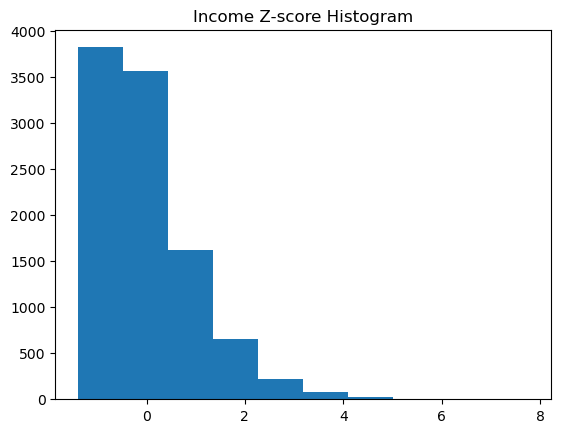

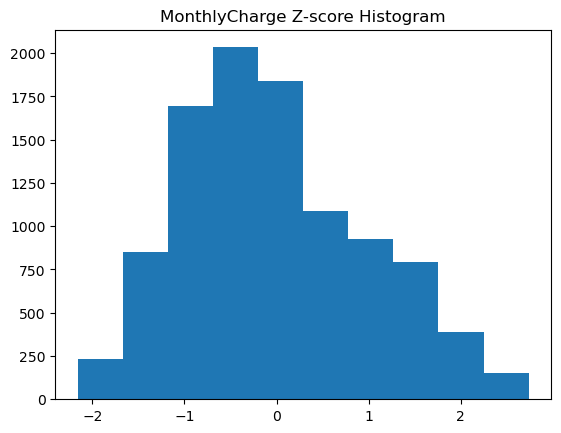

In [9]:
for column in df_n:
    df['zscore'] = stats.zscore(df[column])
    plt.hist(df['zscore'])
    plt.title(column + ' Z-score Histogram')
    plt.show()

In [10]:
# Run a for loop for all the identified variables that need to be fixed that will be replaced with median
df_z_median = ['Income']
df_z_median 
for column in df_z_median:
    # create nulls for outliers in population
    df['zscore'] = stats.zscore(df[column])
    df[column] = np.where(df['zscore'] > 2, np.nan, df[column])
    df[column] = np.where(df['zscore'] < -2, np.nan, df[column])
    # use fillna function to impute outliers with median
    df[column] = df[column].fillna(df[column].median())
    df = df.drop('zscore',axis=1)

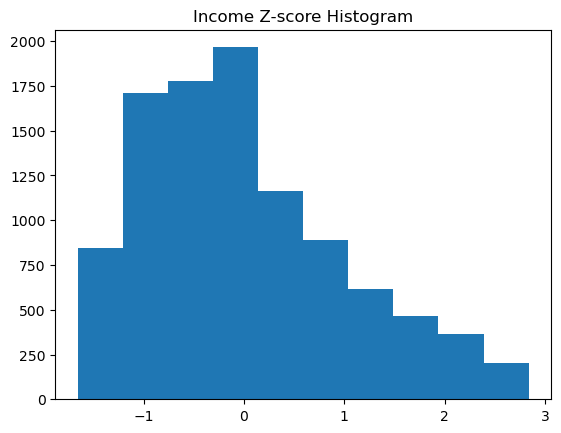

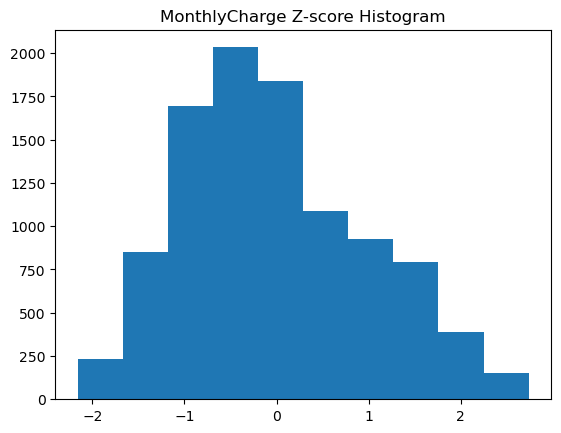

In [11]:
for column in df_n:
    df['zscore'] = stats.zscore(df[column])
    plt.hist(df['zscore'])
    plt.title(column + ' Z-score Histogram')
    plt.show()

### Normalize Data

In [12]:
df_scaled = df.apply(whiten)

In [13]:
df_scaled

,Income,MonthlyCharge,zscore
0,1.339476,4.016109,-0.003943
1,1.017892,5.650377,1.630326
2,0.450662,3.724827,-0.295225
3,0.887540,2.793530,-1.226521
4,1.879366,3.491966,-0.528086
...,...,...,...
9995,2.613285,3.725568,-0.294484
9996,1.600569,4.831777,0.811726
9997,2.156492,3.958322,-0.061729
9998,0.781662,5.883056,1.863005


## C4:CLEANED DATA SET


After applying the pre-processing steps, this is the cleaned dataset:

In [14]:
df_scaled

,Income,MonthlyCharge,zscore
0,1.339476,4.016109,-0.003943
1,1.017892,5.650377,1.630326
2,0.450662,3.724827,-0.295225
3,0.887540,2.793530,-1.226521
4,1.879366,3.491966,-0.528086
...,...,...,...
9995,2.613285,3.725568,-0.294484
9996,1.600569,4.831777,0.811726
9997,2.156492,3.958322,-0.061729
9998,0.781662,5.883056,1.863005


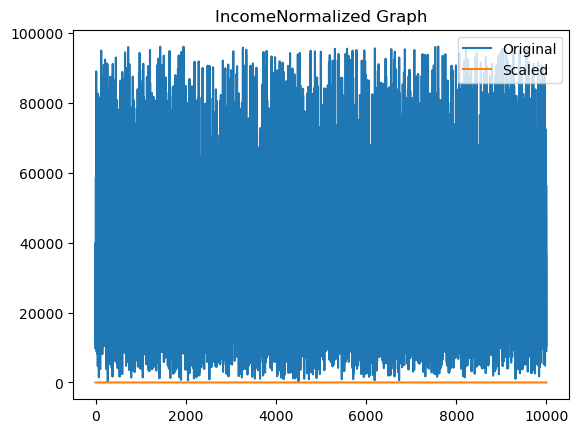

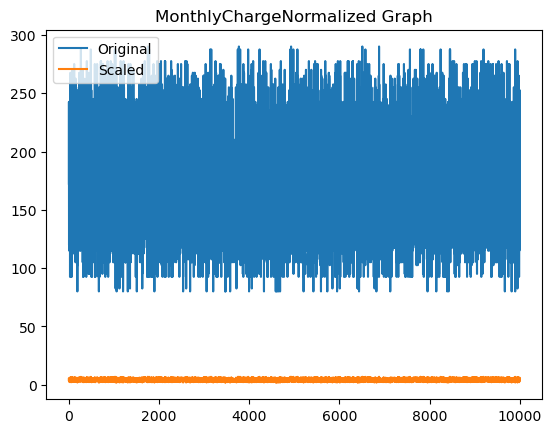

In [15]:
for column in df_n:
    plt.plot(df[column],label = 'Original')
    plt.plot(df_scaled[column],label = 'Scaled')
    plt.legend()
    plt.title(column + 'Normalized Graph')
    plt.show()

In [16]:
df.to_csv('task1_prepared_data.csv')

## D1:OUTPUT AND INTERMEDIATE CALCULATIONS


We will start by trying to figure out the optimal number of clusters for our k-means clustering model. I am going to use the elbow method.

In [17]:
# Start by declaring variables to use
distortions = []

num_clusters = range(2,7)

In [18]:
# Populate distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df_scaled,i)
    distortions.append(distortion)

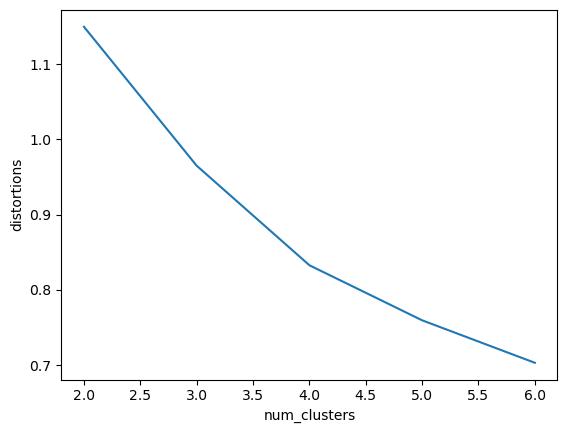

In [19]:
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                                'distortions': distortions})

sns.lineplot(x='num_clusters',y='distortions',
             data = elbow_plot_data)

plt.show()

After graphing our distortions and number of clusters, we can see our kink in the elbow is at 5 clusters. That means that we should use n=5 for our k-means.

## D2:CODE EXECUTION


For this code execution we use k-means clustering from sklearn.

In [20]:
# Generate cluster centers
cluster_centers, distortion = kmeans(df_scaled[['Income', 'MonthlyCharge']], 5)


In [21]:
# Assign cluster labels
df_scaled['cluster_labels'], distortion_list = vq(df_scaled[['Income', 'MonthlyCharge']], cluster_centers)

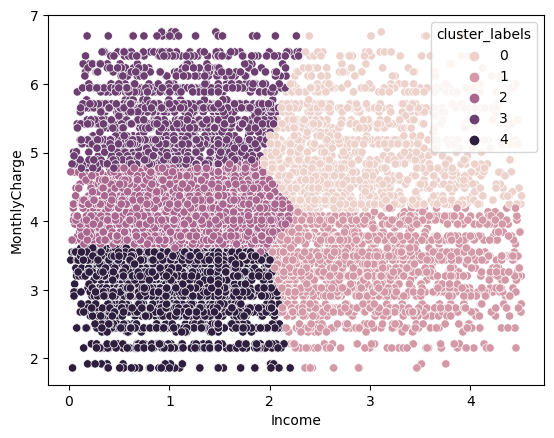

In [22]:
# Plot clusters
sns.scatterplot(x='Income', y='MonthlyCharge', 
                hue='cluster_labels', data = df_scaled)
plt.show()

## E1:QUALITY OF THE CLUSTERING TECHNIQUE


The quality of the clusters that were created by the k-means method is usable because they have distinctive groups that I can attach to different clear segmentations of the customers. For instance, we can see lower income, medium income lower monthly charge, medium income medium monthly charge, medium income high monthly charge, and higher income. This is a harder dataset to create clusters on  because there are no obvious spherical divisions of clusters on the graph. However, the clusters presented by this model are still usable to define different cluster or segmentations of customers and is still useful for providing business context to this data as a result.

## E2:RESULTS AND IMPLICATIONS


The results of this model are that we have 5 clusters. They can be seperated into 5 different business customer segmentations: lower income, medium income lower monthly charge, medium income medium monthly charge, medium income high monthly charge, and higher income. 

The implications for this is that maybe the pricing of the model for the business is not correct. An optimal curve would probably something with the segments appearing more linearly, with the business providing more value and charging more towards higher income customers, and charging less towards lower income customers. However, the segmentations show us that there is a very uniform spread of monthly charge rates and income. Now that there are segmentations however, these segmentations can be used to start implementing pricing adjustments as the business sees fit in regards to customer income.

## E3:LIMITATION


There are a few limitations when it comes to utilizing the k-means clustering method. These include:
- The elbow method does not always work when determining n number of clusters
- There is a bias towards equal sized clusters. I think this one is more apparent in datasets that look like the one that was used in this analysis. Since there are not clear distinct seperate clusters, the k-means may choose arbitrarily even sized clusters as opposed to clear direct seperate clusters of data. 
- This analysis only uses two columns in the data that was provided. This gives a very zoomed in perspective on the customer segments. There is much more data to draw from, and more insightful segmentation can probably be achieved through consideration of that extra data

## E4:COURSE OF ACTION


Now that we have results for our k-means clustering, the next course of action would to turn it into a presentable format with specific insights from this data. This could look like importing this into either a power point presentation or a Power BI report. From there, this data can be presented to a stakeholder in a much more insightful way. Then the stakeholder can take the provided insights from my analysis, and create their own conclusions and take action in a way that they see fit to benefit the business.

## G:SOURCES FOR THIRD-PARTY CODE


https://app.datacamp.com/learn/courses/cluster-analysis-in-python

## H:SOURCES

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3de3be7f-128b-4ed1-b2d6-b0ee01871d39

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

https://www.geeksforgeeks.org/hierarchical-clustering/